<a href="https://colab.research.google.com/github/Gurpinder60/sql/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Customer Churn Data/customer_churn_data.csv')

print(df.head())

   CustomerID  Age  Gender  Tenure  MonthlyCharges    ContractType  \
0           1   49    Male       4           88.35  Month-to-Month   
1           2   43    Male       0           36.67  Month-to-Month   
2           3   51  Female       2           63.79  Month-to-Month   
3           4   60  Female       8          102.34        One-Year   
4           5   42    Male      32           69.01  Month-to-Month   

  InternetService  TotalCharges TechSupport Churn  
0     Fiber Optic        353.40         Yes   Yes  
1     Fiber Optic          0.00         Yes   Yes  
2     Fiber Optic        127.58          No   Yes  
3             DSL        818.72         Yes   Yes  
4             NaN       2208.32          No   Yes  


In [55]:
# Check for missing values in all columns
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values)

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64


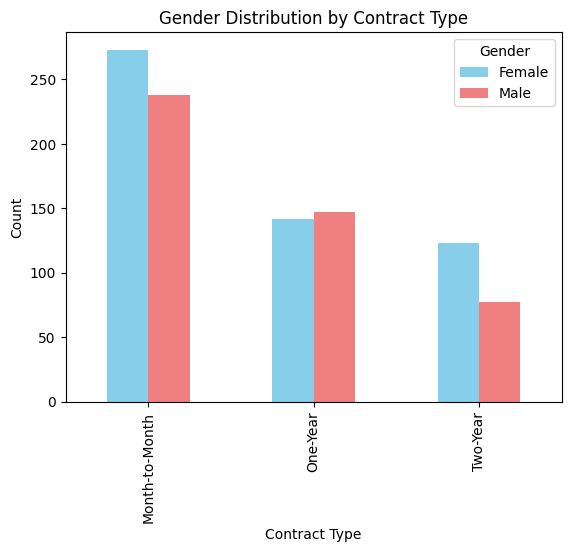

In [56]:
gender_counts = df.groupby(['ContractType', 'Gender']).size().unstack()

# Create the bar chart
gender_counts.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral'])

# Adding labels and title
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Gender Distribution by Contract Type')

# Add legend
plt.legend(title='Gender')

# Display the graph
plt.show()

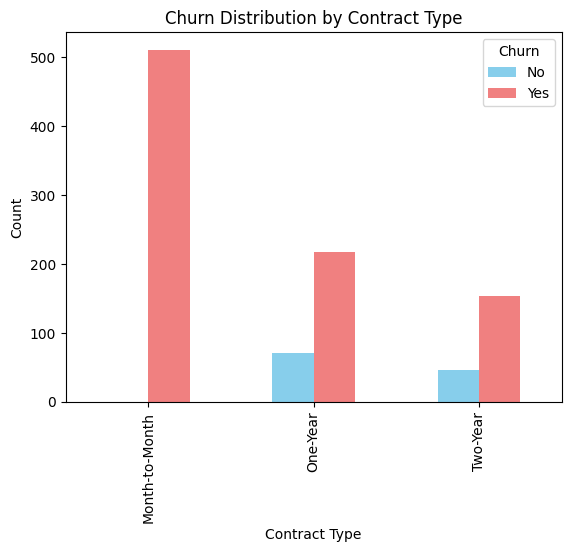

In [57]:
churn_counts = df.groupby(['ContractType', 'Churn']).size().unstack()

# Create the bar chart
churn_counts.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral'])

# Adding labels and title
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Churn Distribution by Contract Type')

# Add legend
plt.legend(title='Churn')

# Display the graph
plt.show()

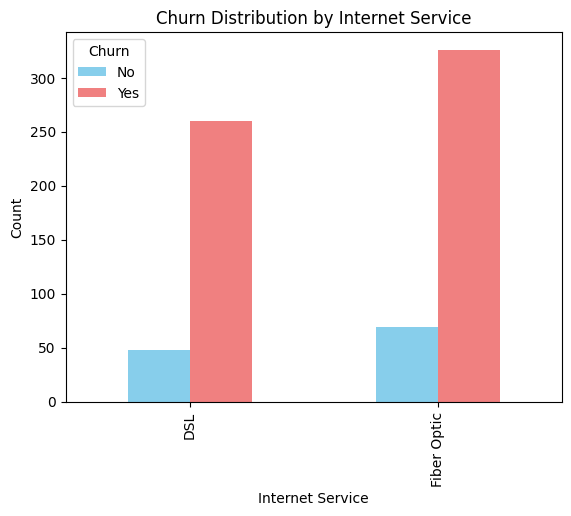

In [58]:
churn_counts = df.groupby(['InternetService', 'Churn']).size().unstack()

# Create the bar chart
churn_counts.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral'])

# Adding labels and title
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Churn Distribution by Internet Service')

# Add legend
plt.legend(title='Churn')

# Display the graph
plt.show()

<ipython-input-59-6f013524772b>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_counts = df.groupby(['TenureGroup', 'Churn']).size().unstack()


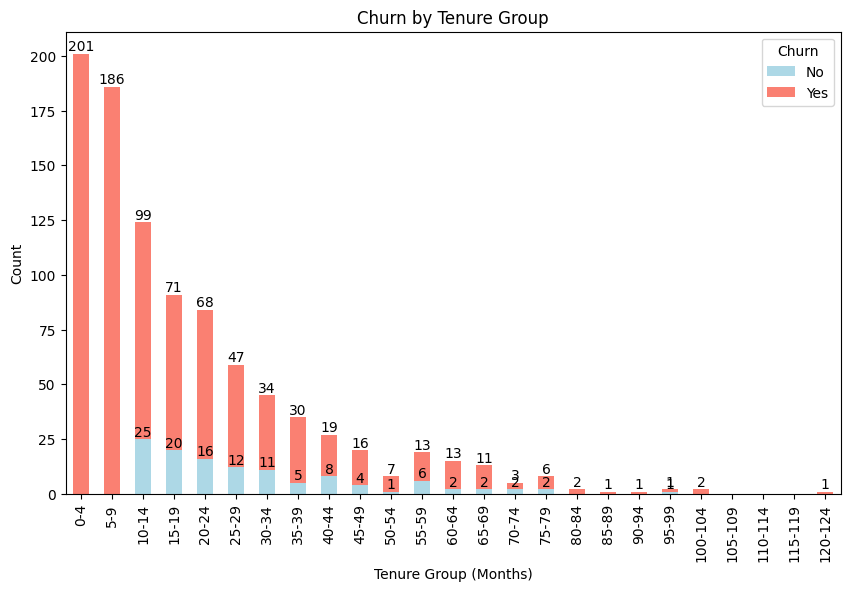

In [59]:
# Find the minimum and maximum tenure
min_tenure = df['Tenure'].min()
max_tenure = df['Tenure'].max()

# Define bin width (e.g., 5 months) and dynamically create bins
bin_width = 5
bins = np.arange(min_tenure, max_tenure + bin_width, bin_width)

# Create bin labels based on the bin ranges
labels = [f'{int(bins[i])}-{int(bins[i+1])-1}' for i in range(len(bins)-1)]

# Group Tenure into these bins
df['TenureGroup'] = pd.cut(df['Tenure'], bins=bins, labels=labels)

# Count occurrences of Churn ('Yes'/'No') for each Tenure group
churn_counts = df.groupby(['TenureGroup', 'Churn']).size().unstack()

# Plotting the stacked bar chart
ax = churn_counts.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], figsize=(10, 6))

# Adding labels and title
plt.xlabel('Tenure Group (Months)')
plt.ylabel('Count')
plt.title('Churn by Tenure Group')

# Add legend
plt.legend(title='Churn')

# Adding values to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fmt='%d', labels=[f'{int(v)}' if v != 0 else '' for v in i.datavalues])

# Display the chart
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Replace NaN in 'InternetService' with 'Not Available'
df['InternetService'] = df['InternetService'].fillna('Not Available')
df = df.drop('TenureGroup', axis=1)
# Convert 'Churn' column to binary (0: No, 1: Yes)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Column Transformer for One-Hot Encoding and Scaling
numeric_features = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['Gender', 'ContractType', 'InternetService', 'TechSupport']

# Preprocessing: Scaling numerical data and encoding categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 3. Logistic Regression Model Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# 4. Train the model
model.fit(X_train, y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

# 6. Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.74      0.79        23
           1       0.97      0.98      0.97       177

    accuracy                           0.95       200
   macro avg       0.91      0.86      0.88       200
weighted avg       0.95      0.95      0.95       200



In [65]:

def broad_match_gender(gender_input):
    gender_input = gender_input.lower()
    if gender_input in ['m', 'male']:
        return 'Male'
    elif gender_input in ['f', 'female']:
        return 'Female'
    else:
        raise ValueError("Invalid Gender input. Use Male/Female.")

def broad_match_contract_type(contract_input):
    contract_input = contract_input.lower()
    if 'month' in contract_input:
        return 'Month-to-month'
    elif 'one' in contract_input:
        return 'One-Year'
    elif 'two' in contract_input:
        return 'Two-Year'
    else:
        raise ValueError("Invalid Contract Type input. Use Month-to-month/One-Year/Two-Year.")

def broad_match_internet_service(internet_input):
    internet_input = internet_input.lower()
    if 'dsl' in internet_input:
        return 'DSL'
    elif 'fiber' in internet_input:
        return 'Fiber Optic'
    elif 'not' in internet_input or 'na' in internet_input:
        return 'Not Available'
    else:
        raise ValueError("Invalid Internet Service input. Use DSL/Fiber optic/Not Available.")

def broad_match_tech_support(tech_input):
    tech_input = tech_input.lower()
    if tech_input in ['yes', 'y']:
        return 'Yes'
    elif tech_input in ['no', 'n']:
        return 'No'
    else:
        raise ValueError("Invalid Tech Support input. Use Yes/No.")
# Function to take user input and make a prediction
def predict_churn(Age, Gender, Tenure, MonthlyCharges, ContractType, InternetService, TotalCharges, TechSupport):
    # Create a DataFrame with the input values
    input_data = pd.DataFrame({
        'Age': [Age],
        'Gender': [broad_match_gender(Gender)],
        'Tenure': [Tenure],
        'MonthlyCharges': [MonthlyCharges],
        'ContractType': [broad_match_contract_type(ContractType)],
        'InternetService': [broad_match_internet_service(InternetService)],
        'TotalCharges': [TotalCharges],
        'TechSupport': [broad_match_tech_support(TechSupport)]
    })

    # Make the prediction
    prediction = model.predict(input_data)[0]

    # Return the prediction (0: No Churn, 1: Churn)
    return "Customer will churn" if prediction == 1 else "Customer will not churn"

# Example of user input
Age = int(input("Enter Age: "))
Gender = input("Enter Gender (Male/Female): ")
Tenure = int(input("Enter Ttenure (months): "))
MonthlyCharges = float(input("Enter Monthly Charges: "))
ContractType = input("Enter Contract Type (Month-to-month/One-Year/Two-Year): ")
InternetService = input("Enter Internet Service (DSL/Fiber Optic/Not Available): ")
TotalCharges = float(input("Enter Total Charges: "))
TechSupport = input("Enter Tech Support (Yes/No): ")

# Predict Churn
result = predict_churn(Age, Gender, Tenure, MonthlyCharges, ContractType, InternetService, TotalCharges, TechSupport)
print(result)

Enter Age: 35
Enter Gender (Male/Female): Male
Enter Ttenure (months): 15
Enter Monthly Charges: 150
Enter Contract Type (Month-to-month/One year/Two year): One
Enter Internet Service (DSL/Fiber optic/Not Available): fiber
Enter Total Charges: 30
Enter Tech Support (Yes/No): yes
Customer will churn
